In [1]:
##FOCUS: Incentivize Drivers (Insurance) 

In [2]:
import os
os.chdir('C:\\Users\\User\\Documents\\PYTHON\Works\\Unsupervised Learning')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)

#id: Unique Id of the driver .
#mean_dist_day: Mean distance driven by driver per day
#mean_over_speed_perc: Mean percentage of time a driver was > 5 mph over the speed limit

In [3]:
df=pd.read_csv('driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
# Check the no. of records -- It should be 4000
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
id                      4000 non-null int64
mean_dist_day           4000 non-null float64
mean_over_speed_perc    4000 non-null int64
dtypes: float64(1), int64(2)
memory usage: 93.8 KB


In [5]:
# Check the Basic Distribution of Data
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [6]:
#ELBOW PLOT TO DETERMINE K

In [8]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['mean_dist_day','mean_over_speed_perc']])
    sse.append(km.inertia_)

In [9]:
sse

[12184626.129627975,
 1316420.8509477186,
 992634.060670247,
 719601.1096991899,
 534637.6772506754,
 372841.1736152498,
 319744.55644703883,
 276908.3455369324,
 252798.82394889652]

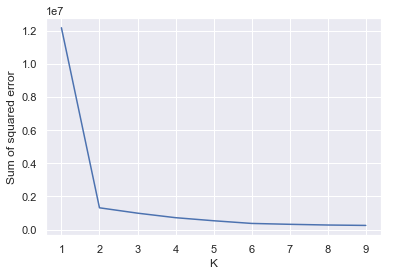

In [10]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

** Create an instance of a K Means model with 2 clusters.**

In [11]:
# Using the KMeans from sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
df_analyze = df.drop('id',axis=1)

**Fit the model to all the data except for the id label.**

In [12]:
kmeans.fit(df_analyze)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['mean_dist_day','mean_over_speed_perc']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
df['cluster']=y_predicted
df.head()

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0


In [15]:
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [16]:
kmeans.cluster_centers_

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [17]:
#HOW MANY DRIVERS ARE THERE IN EACH CLUSTER 

In [18]:
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


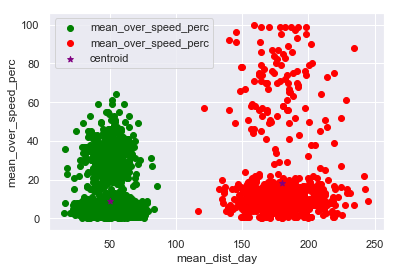

In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.mean_dist_day,df1['mean_over_speed_perc'],color='green')
plt.scatter(df2.mean_dist_day,df2['mean_over_speed_perc'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.legend()

In [21]:
#Depending on business decision, the drivers within the green clusters maybe with fewer incentives because of over speeding. They cover a short distance with a higher speed** 

In [22]:
#K Means model with 3 clusters

In [23]:
kmeans = KMeans(n_clusters=3)
df_analyze = df.drop('id',axis=1)
kmeans.fit(df_analyze)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['mean_dist_day','mean_over_speed_perc']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [25]:
kmeans.cluster_centers_

array([[ 5.00476344e+01,  8.82875000e+00, -2.66453526e-15],
       [ 1.80343118e+02,  1.05201149e+01,  1.00000000e+00],
       [ 1.77835096e+02,  7.02884615e+01,  1.00000000e+00]])

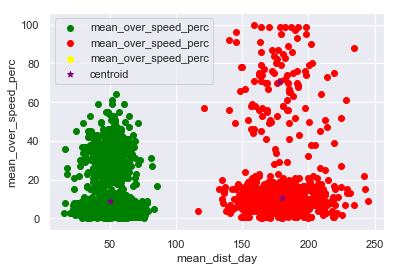

In [26]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.mean_dist_day,df1['mean_over_speed_perc'],color='green')
plt.scatter(df2.mean_dist_day,df2['mean_over_speed_perc'],color='red')
plt.scatter(df3.mean_dist_day,df3['mean_over_speed_perc'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.legend()

In [28]:
#HOW MANY DRIVERS ARE IN THE 3 CLUSTER
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 696, 2: 104}
